# 8/28 Lecture: EDA Primer – Distributions, Variation, and Basic Plotting

In this lecture, we will learn how to explore a dataset through summary statistics and visualizations.
This is the first step in any data science or machine learning workflow.

**Topics Covered:**
- What is EDA and why it matters
- Summary statistics (mean, median, mode, std)
- Visualizing numeric and categorical variables
- Identifying distributions, skew, and outliers

## Load the Titanic Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## What is EDA (Exploratory Data Analysis)?

Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics.
It's typically the first step before modeling, and it's done both through numerical summaries and visual methods.

**Goals of EDA:**
- Identify patterns and trends
- Detect outliers or anomalies
- Understand variable distributions
- Generate hypotheses about relationships

## Summary Statistics: Numeric Columns

This table shows count, mean, std, min, and various percentiles for all numeric columns.
Use it to understand scale, center, and spread of each variable.

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here we explicitly calculate the mean, median, and mode of `Age`.

- **Mean**: average value
- **Median**: middle value (better for skewed data)
- **Mode**: most frequently occurring value

In [ ]:
df['Age'].mean(), df['Age'].median(), df['Age'].mode()[0]

(np.float64(29.69911764705882), 28.0, np.float64(24.0))

## Histogram: Distribution of Age

A histogram shows the distribution of a numeric variable.
It counts how many data points fall into each bin (interval).

We use it to identify skewness, modality (unimodal, bimodal), and whether the data is symmetric or not.

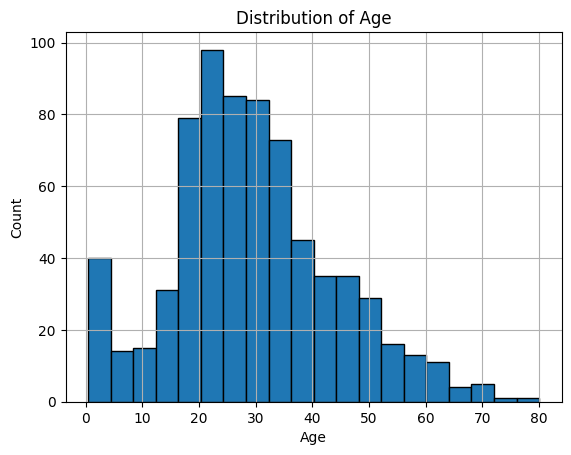

In [ ]:
df['Age'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

This version uses Seaborn with a **kernel density estimate (KDE)** overlay.
The KDE curve smooths the histogram into a continuous probability density function.

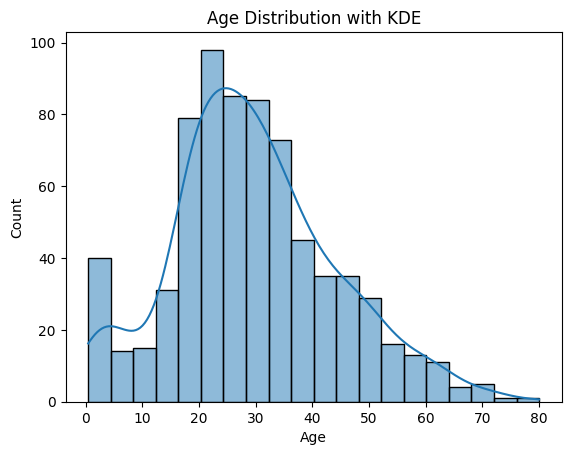

In [ ]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution with KDE')
plt.show()

## Boxplot: Fare

Boxplots summarize the distribution of a variable using five key numbers:
- Minimum
- First quartile (Q1)
- Median (Q2)
- Third quartile (Q3)
- Maximum

They also show **outliers** — points that lie beyond 1.5×IQR.

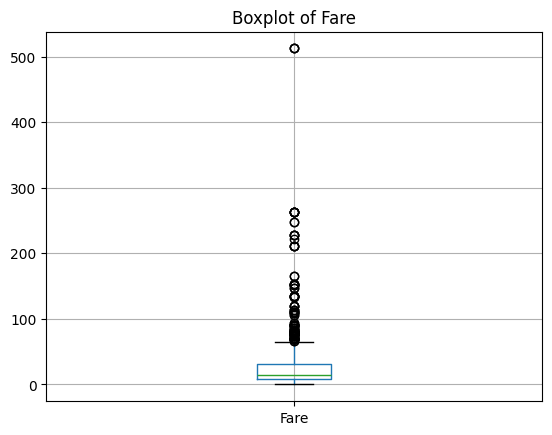

In [ ]:
df.boxplot(column='Fare')
plt.title('Boxplot of Fare')
plt.show()

Here we use Seaborn to compare the distribution of `Fare` across `Pclass` (ticket class).
This shows how price varies by class and highlights differences in spread and outliers.

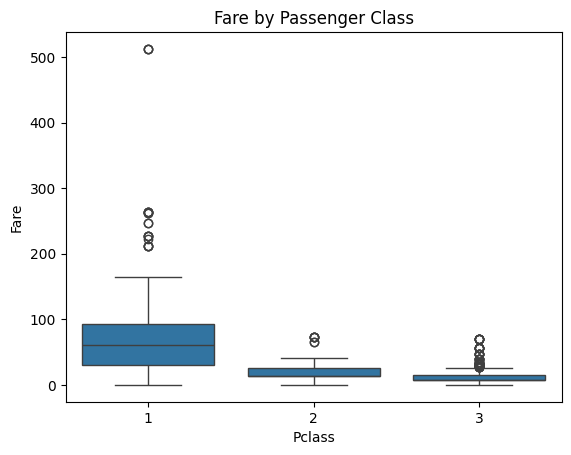

In [ ]:
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare by Passenger Class')
plt.show()

## Bar Plot: Gender Distribution

Bar plots are used for **categorical variables**.
They count how many times each category appears.

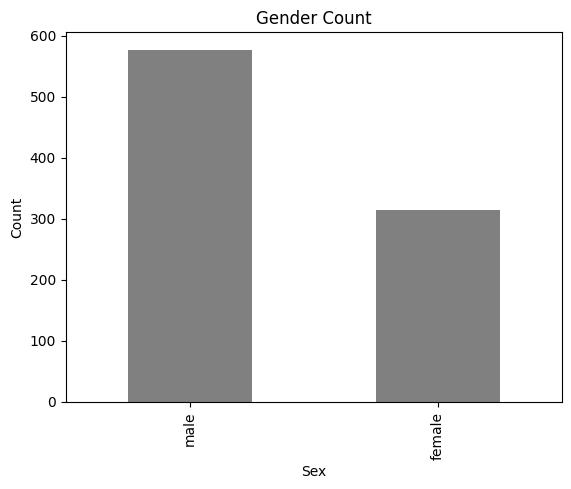

In [ ]:
df['Sex'].value_counts().plot(kind='bar', color='gray')
plt.title('Gender Count')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

This version uses Seaborn’s `countplot`, which is specifically designed for categorical variables.
It works well with groupings and automatic ordering.

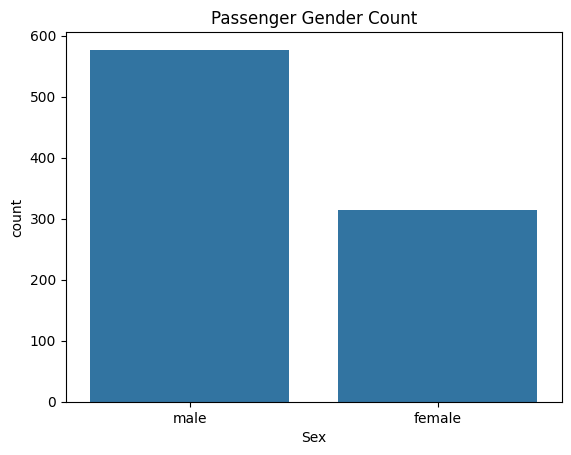

In [ ]:
sns.countplot(x='Sex', data=df)
plt.title('Passenger Gender Count')
plt.show()

## Summary and Takeaways

**In this lesson, you learned:**
- What EDA is and why it matters
- How to compute and interpret summary statistics
- How to use histograms and boxplots to understand distributions
- How to use bar charts to understand categorical variables

**Next time:** we’ll explore how features relate to one another using bivariate plots (scatter, correlation, trendlines).